## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [5]:
df = pd.read_csv('./cleaned_ecommerce_dataset.csv')
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [6]:
print(len(df))

2685


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [8]:
type('userId')
type('timestamp')
type('review')
type('item')
type('rating')
type('helpfulness')
type('gender')
type('category')
type('item_id')
type('item_price')
type('user_city')

str

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df[["gender", "gender_code"]].head(11)

,gender,gender_code
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0
5,M,1.0
6,M,1.0
7,M,1.0
8,M,1.0
9,M,1.0


In [10]:
df["cat_code"] = ord_enc.fit_transform(df[["category"]])
df[["category", "cat_code"]].head(11)

,category,cat_code
0,Restaurants & Gourmet,8.0
1,Restaurants & Gourmet,8.0
2,Restaurants & Gourmet,8.0
3,Movies,5.0
4,Movies,5.0
5,Movies,5.0
6,Movies,5.0
7,Media,4.0
8,Movies,5.0
9,Restaurants & Gourmet,8.0


In [11]:
df["review_code"] = ord_enc.fit_transform(df[["review"]])
df[["review", "review_code"]].head(11)

,review,review_code
0,Not always McCrap,1618.0
1,I dropped the chalupa even before he told me to,1125.0
2,The Wonderful World of Wendy,2185.0
3,They actually did it,2243.0
4,Hey! Gimme some pie!,1033.0
5,Good for sci-fi,925.0
6,Scary? you bet!,1854.0
7,Fox - the 4th basic channel,795.0
8,Amen!,262.0
9,mama mia!,2643.0


In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,userId,timestamp,rating,helpfulness,item_id,item_price,user_city,gender_code,cat_code,review_code
userId,1.000000,-0.069176,0.032506,-0.166136,-0.005549,0.024576,-0.030031,-0.058324,-0.041362,0.007139
timestamp,-0.069176,1.000000,0.000369,0.014179,-0.004452,0.010979,-0.014934,-0.003367,0.015009,0.007029
rating,0.032506,0.000369,1.000000,-0.007523,0.042890,0.027374,-0.028825,-0.034337,-0.163158,-0.036118
helpfulness,-0.166136,0.014179,-0.007523,1.000000,-0.019882,0.004112,0.012086,0.075947,-0.013408,-0.028259
item_id,-0.005549,-0.004452,0.042890,-0.019882,1.000000,-0.054450,-0.005576,0.002370,-0.045268,0.163544
item_price,0.024576,0.010979,0.027374,0.004112,-0.054450,1.000000,-0.023427,-0.040596,-0.115571,-0.041421
user_city,-0.030031,-0.014934,-0.028825,0.012086,-0.005576,-0.023427,1.000000,-0.065638,0.008017,0.045626
gender_code,-0.058324,-0.003367,-0.034337,0.075947,0.002370,-0.040596,-0.065638,1.000000,0.022549,-0.037884
cat_code,-0.041362,0.015009,-0.163158,-0.013408,-0.045268,-0.115571,0.008017,0.022549,1.000000,0.001970
review_code,0.007139,0.007029,-0.036118,-0.028259,0.163544,-0.041421,0.045626,-0.037884,0.001970,1.000000


#### Final Prediction Hypothesis
The most correlated features regarding rating are 'hepfulness' and 'gender'.Positive correlation means that as the values increase, the rating tends to increase as well. However, 'helpfulness' correlation is very close to zero, therefore, the linear relationship with 'rating' may not be significant.

The least correlated features regarding rating are 'category' and 'review'.Negative correlation means that as the values increase, the rating tends to decrease.

When training regression model, with low correlation removed, it may improve model simplicity without significantly affecting predictive accuracy. Removing highly correlated features, the model may be simpler and more interpretable that generalizes better.



### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [13]:
train1, test1 = train_test_split(df, test_size=0.1, random_state=142)
print(train1.shape)
print(test1.shape)

(2416, 14)
(269, 14)


In [14]:
train2, test2 = train_test_split(df, test_size=0.9, random_state=142)
print(train2.shape)
print(test2.shape)

(268, 14)
(2417, 14)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [15]:
reg_1 = linear_model.LinearRegression()
reg_2 = linear_model.LinearRegression()
reg_3 = linear_model.LinearRegression()
reg_4 = linear_model.LinearRegression()
# model-a
X_train_a = train1[['helpfulness', 'gender_code']]
y_train_a = train1['rating']

X_test_a = test1[['helpfulness', 'gender_code']]
y_test_a = test1['rating']

reg_1.fit(X_train_a, y_train_a)

# model-b
X_train_b = train1[['cat_code', 'review_code']]
y_train_b = train1['rating']

X_test_b = test1[['cat_code', 'review_code']]
y_test_b = test1['rating']

reg_2.fit(X_train_b, y_train_b)

# model-c
X_train_c = train2[['helpfulness', 'gender_code']]
y_train_c = train2['rating']

X_test_c = test2[['helpfulness', 'gender_code']]
y_test_c = test2['rating']

reg_3.fit(X_train_c, y_train_c)

# model-d
X_train_d = train2[['cat_code', 'review_code']]
y_train_d = train2['rating']

X_test_d = test2[['cat_code', 'review_code']]
y_test_d = test2['rating']

reg_4.fit(X_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [16]:
# model-a
predicted1 = reg_1.predict(X_test_a)
mse1 = ((np.array(y_test_a)-predicted1)**2).sum()/len(y_test_a)
r2_1 = r2_score(y_test_a, predicted1)
print("MSE:", mse1)
print("Root MSE:", np.sqrt(mse1))
print("R Squared:", r2_1)

MSE: 1.8109460127732369
Root MSE: 1.3457139416581954
R Squared: -0.006899007486201425


In [17]:
# model-b
predicted2 = reg_2.predict(X_test_b)
mse2 = ((np.array(y_test_b)-predicted2)**2).sum()/len(y_test_b)
r2_2 = r2_score(y_test_b, predicted2)
print("MSE:", mse2)
print("Root MSE:", np.sqrt(mse2))
print("R Squared:", r2_2)

MSE: 1.758897535980505
Root MSE: 1.3262343442923294
R Squared: 0.022040319944943154


In [18]:
# model-c
reg_3.fit(X_train_c, y_train_c)
predicted3 = reg_3.predict(X_test_c)
mse3 = ((np.array(y_test_c)-predicted3)**2).sum()/len(y_test_c)
r2_3 = r2_score(y_test_c, predicted3)
print("MSE:", mse3)
print("Root MSE:", np.sqrt(mse3))
print("R Squared:", r2_3)

MSE: 1.8412549895856636
Root MSE: 1.356928513071217
R Squared: -0.019383789895821568


In [19]:
# model-d
reg_4.fit(X_train_d, y_train_d)
predicted4 = reg_4.predict(X_test_d)
mse4 = ((np.array(y_test_d)-predicted4)**2).sum()/len(y_test_d)
r2_4 = r2_score(y_test_d, predicted4)
print("MSE:", mse4)
print("Root MSE:", np.sqrt(mse4))
print("R Squared:", r2_4)

MSE: 1.7690740179517055
Root MSE: 1.3300654186737229
R Squared: 0.020578145218415278


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

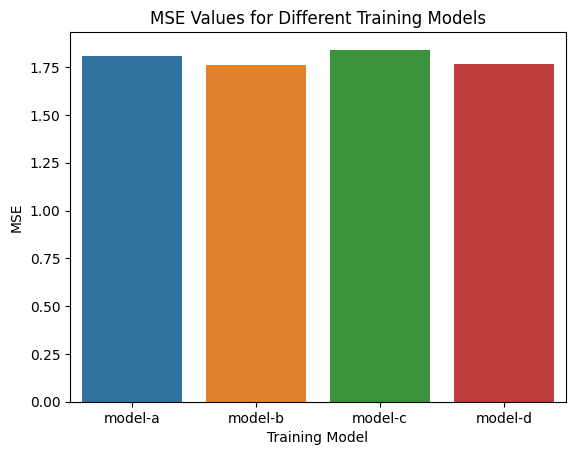

In [20]:
mse_values = [mse1, mse2, mse3, mse4]
model_names = ['model-a', 'model-b', 'model-c', 'model-d']
data = {'Model': model_names, 'MSE': mse_values}
df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='MSE')
plt.xlabel('Training Model')
plt.ylabel('MSE')
plt.title('MSE Values for Different Training Models')
plt.show()

#### Analysis
From the bar plot visualization, model-b and model-d perform better than the other two models. As MSE and RMSE values indicate the prediction errors, therefore, the smaller MSE and RMSE values influence better model performances. This means the predictions quite match the actual values. A smaller MSE and RMSE is a result from removing high correlated features.
